# Corner Detection

**Motivation**:  shifting a window W in any direction should give a large change in intensity.

```{figure} ../../../images/corner/motivation.png
---
scale: 100%
---
```

## Math background


### Correlation
Given $\textbf{f - image, h - kernel}$ <br>
<span style="color:blue"> *cross correlation* </span>

$$ g=f \otimes h $$

$$g(i, j)=\sum_{k} \sum_{l} f(i+k, j+l) h(k, l)$$

<span style="color:blue"> *auto correlation* </span>

$$g=f \otimes f $$ 

$$g(i, j)=\sum_{k} \sum_{l} f(i+k, j+l) f(k, l)$$

<span style="color:blue"> *Normalized cross correlation* </span>

$$g_{N}(i,j) = \frac{\sum_{k} \sum_{l} f(i+k, j+l) h(k, l)} 
{\sqrt{\sum_{k} \sum_{l} f^{2}(i+k, j+l)} {\sqrt{\sum_{k} \sum_{l} h^{2}(k, l)}}}$$




### Summed square difference (SSD)
$$SSD(i,j)=\sum_{k} \sum_{l}(f(i+k, j+l)-h(k, l))^{2} $$ 

$$ SSD(i,j)=\sum_{k} \sum_{l}\left({f(i+k, j+l)^{2}}-2 f(i+k, j+l) h(k, l)
        +{h(k, l)^{2}}\right) \\ 
        = \sum_{k} \sum_{l}(-2 f(i+k, j+l) h(k, l))$$

This is used in [template matching](https://github.com/EeToSe/drawing-recognition/blob/terminal-detection/result/terminal/D304-zhubianbenti1-result.png). See {download}`Correspondence Matching <./templatematching.pdf>`


### Relation between SSD and cross correlation
$$ \mathop{SSD(i,j)}\limits_{minimize} = \sum_{k} \sum_{l}{-2 h(i+k, j+l) f(k, l)} \\
    \text{is equivalent  to} \\
    \mathop{\text{cross correlation(i,j)}} \limits_{maximize} = \sum_{k} \sum_{l} 2 h(i+k, j+l) f(k, l)$$

## Harris Corner Detection

### Error function
Change in appearance of window $w$ for the shift $(u, v)$:

$$E(u, v)=w(x,y)\sum_{(x, y) \in W}[I(x+u, y+v)-I(x, y)]^{2}$$

First-order Taylor approximation for small shifts $(u, v)$ :

$$I(x+u, y+v) \approx \color{red} {I(x, y)}+I_{x} u+I_{y} v$$

Let's plug this into $E(u, v)$:

$$E(u, v)\approx w(x,y)\sum_{(x, y) \in W}\left[I(x, y)+I_{x} u+I_{y} v-I(x, y)\right]^{2} \\
=w(x,y)\sum_{(x, y) \in W}\left[I_{x} u+I_{y} v\right]^{2}= w(x,y)\sum_{(x, y) \in W} I_{x}^{2} u^{2}+2 I_{x} I_{y} u v+I_{y}^{2} v^{2}$$

(section-matrix)= 
### Second moment matrix

$$E(u, v) \approx w(x,y)(u^{2} \sum_{x, y} \color{red}{I_{x}^{2}}+ 2 u v \sum_{x, y} \color{red}{I_{x} I_{y}}+v^{2} \sum_{x, y} \color{red}{I_{y}^{2}}) \\
=\left(\begin{array}{ll}u & v\end{array}\right)M\left(\begin{array}{l}u \\ v\end{array}\right) $$

$$ M = \sum_{x, y}w(x,y)\left[\color{red}{\begin{array}{cc} I_{x}^{2} & I_{x} I_{y} \\  I_{x} I_{y} & I_{y}^{2}\end{array}}\right] = \left[\begin{array}{cc}
 A & B \\
 B & C   
\end{array}\right]$$

This matrix is weighted sum of nearby gradient information (could use Gaussian weighting). 

### Visualization of a quadratic
From [previous section](section-matrix), $E(u, v)$ is **locally** approximated by a quadratic form.

```{figure} ../../../images/corner/quadratic.png
---
scale: 100%
---
```

Since $M$ is symmetric, $M$ could be diagonalized as  

$$ M=R^{-1}\left[\begin{array}{cc}
\lambda_{1} & 0 \\
0 & \lambda_{2}
\end{array}\right] R$$

```{admonition} Ellipse equation
Visualize $M$ as an ellipse with **axis lengths** determined by
the eigenvalues and **orientation** determined by $R$

$$\left(\begin{array}{ll}u & v\end{array}\right)M\left(\begin{array}{l}u \\ v\end{array}\right) = const$$

```{figure} ../../../images/corner/ellipse.png
---
scale: 100%
---
```

### Eigenvalues interpretation

```{figure} ../../../images/corner/eigenvalue.png
---
scale: 100%
---
```

```{admonition} Take-away
- $\lambda_{1}$ and $\lambda_{2}$ both small: no gradient
- $\lambda_{1} \gg \lambda_{2}$ : gradient in one direction
- $\lambda_{1}$ and $\lambda_{2}$ similarly large: multiple gradient directions, corner
``` 

### Threshold on a function of eigenvalues
```{figure} ../../../images/corner/corner-response.png
---
scale: 100%
---
```

```{admonition} Corner response $R$
$$\operatorname{det}(M)=\lambda_{1} \lambda_{2} = AB - C^2\\
\operatorname{trace}(\mathrm{M})=\lambda_{1}+\lambda_{2} = A + B\\
R = \operatorname{det}(M)- \alpha \operatorname{trace}(M)^{2} = \lambda_{1} \lambda_{2} - \alpha(\lambda_{1}+\lambda_{2})^{2}$$ 

If these estimates are large, $\lambda_{1}$ and $\lambda_{2}$ are similarly large.
```

### Summary
Source code: [C++](https://github.com/EeToSe/ELEC4622-2019s2/tree/master/project3/project3/task4) and [Python](https://github.com/EeToSe/image-cv/blob/main/image_analysis/src/ass3/harris_detector.py) implementation.

- Intensity change in direction [u,v] can be expressed as a bilinear form:

$$E(u, v) \approx \left(\begin{array}{ll}u & v\end{array}\right)M\left(\begin{array}{l}u \\ v\end{array}\right)$$

- Compute corner response for each point in terms of eigenvalues of $M$
  
$$R = \lambda_{1} \lambda_{2} - \alpha(\lambda_{1}+\lambda_{2})^{2}$$


- A good corner should have a large intensity change in all directions, i.e. R should be large positive.

```{admonition} Pipeline
1. Compute partial derivatives $I_{x}$ and $I_{y}$ at each pixel 
2. Compute products of derivatives at every pixel
3. Compute the sums of the products of derivatives at each pixel
4. Compute second moment matrix $M$ in a Gaussian window around each pixel
5. Compute corner response function $R=\operatorname{det}(M)-\alpha \operatorname{trace}(M)^{2}$
6. Threshold $R$
7. Find local maxima of response function (NMS)
```

## [Implementaion](https://github.com/EeToSe/image-cv/blob/main/image_analysis/src/ass3/harris.ipynb) in Jupyter

In [ ]:
import numpy as np
from skimage import filters, io
import cv2 as cv
from matplotlib import pyplot as plt
from scipy.ndimage import maximum_filter
from skimage.feature import corner_harris, corner_peaks

from myfunc.mysubplot import subplots

### Step1: Image gradients

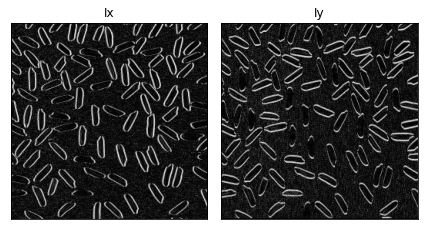

In [ ]:
image = io.imread(fname="../../data/ass3/rice.png")
h,w = image.shape
# keep the output datatype to some higher forms
Ix = cv.Sobel(image,cv.CV_64F,1,0,ksize=1)
abs_Ix = np.absolute(Ix)
Ix_8u = np.uint8(abs_Ix)
Iy = cv.Sobel(image,cv.CV_64F,0,1,ksize=1)
abs_Iy = np.absolute(Iy)
Iy_8u = np.uint8(abs_Iy)

subplots([Ix_8u, Iy_8u], ['Ix', 'Iy'], 1,2)

### Step2: Second movement matrix M 

In [ ]:
# Gaussian truncate window
kernel_size = 3
sigma = 0.5
Ixx = cv.GaussianBlur(Ix**2,(kernel_size,kernel_size), sigma)
Ixy = cv.GaussianBlur(Ix*Iy,(kernel_size,kernel_size), sigma)
Iyy = cv.GaussianBlur(Iy**2,(kernel_size,kernel_size), sigma)

### Step3: Compute corner response function R

In [ ]:
offset = np.int8(kernel_size/2)
height, width = image.shape
corner_response = np.zeros((height, width))

# construct matrix elements
k = 0.02
for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        A = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
        C = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
        B = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])
        det = (A * C) - (B**2)
        trace = A + C
        R = det - k*(trace**2)
        corner_response[y][x] = R

### Step4: Corner response calculation and Non-maximum suppression

In [ ]:
# Response threshold 0.2*r_max 
R_max = np.max(corner_response)
Threshold_mask = corner_response > 0.2*R_max
# Non max suppression mask
NMS_mask = (corner_response == maximum_filter(corner_response, 5))
mask = Threshold_mask & NMS_mask
keypoints = np.argwhere(mask==True)

# compare with open source library
# keypoints = corner_peaks(corner_harris(image), min_distance=5, threshold_rel=0.02)

### Intermediate results visualization

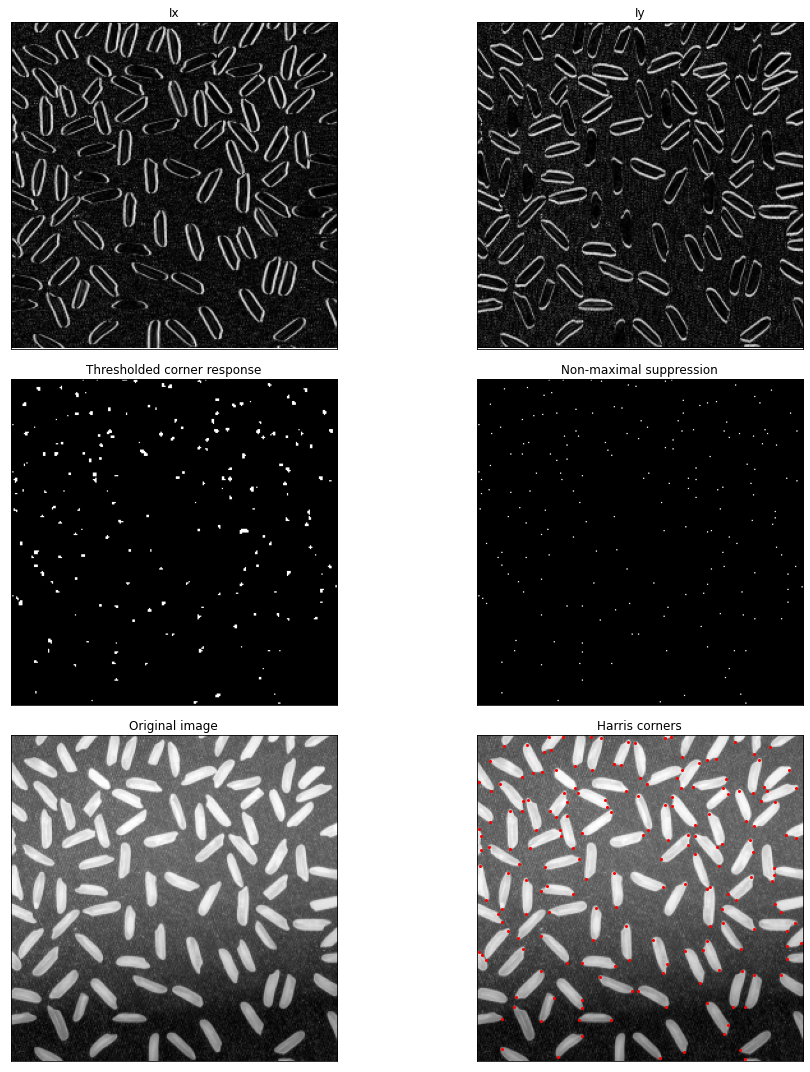

In [ ]:
plt.figure(figsize=(15, 15))
imgs =  [Ix_8u, Iy_8u, Threshold_mask, mask, image]
titles = ['Ix', 'Iy', 'Thresholded corner response', 'Non-maximal suppression', 'Original image']

for i in range(5):
  plt.subplot(3,2,i+1),plt.imshow(imgs[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.subplot(3,2,6)
plt.imshow(imgs[-1], cmap=plt.cm.gray)
plt.plot(keypoints[:, 1], keypoints[:, 0], color='red', marker='o',
        linestyle='None', markersize=2)
plt.title('Harris corners')
plt.xticks([]),plt.yticks([])
plt.tight_layout()
plt.show()


## Invariance discussion

### Rotation invariance
```{figure} ../../../images/corner/rotation.png
---
scale: 100%
---
```

```{admonition} Corner response R is invariant to image rotation
Since Ellipse rotates but its shape (i.e. eigenvalues) remains the same.
```

### Photometric transformations
```{figure} ../../../images/corner/intensity.png
---
scale: 100%
---
```

```{admonition}  Partial invariance to additive and multiplicative intensity changes
**Not** invariant to changes in contrast.
```

### Scale invariance
```{figure} ../../../images/corner/scale.png
---
scale: 100%
---
```

```{admonition}  Not invariant to scaling
Blob detection with Laplacian kernel could solve this.
```